In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from utils import *

In [2]:
# importing the data
datafolder = '../../data/hateful_memes/'
train = datafolder+'train_with_features.csv'
test = datafolder+'test_with_features.csv'
dev = datafolder+'dev_with_features.csv'
df_train = pd.read_csv(train, keep_default_na=False)
df_dev = pd.read_csv(dev, keep_default_na=False)
df_test = pd.read_csv(test, keep_default_na=False)

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
image_models = ['ResNet_svm_rbf_kernel', 'ResNet_svm_rbf_kernelC10',
       'ResNet_svm_linear_kernel', 'ResNet_svm_linear_kernelC10', 'ResNet_nn']
text_models = ['svm_BoW_baseline_linear_C10', 'Advanced_svm_linear_100K_C10', 
       'hatebert_direct', 'hatebert_vectors', 'bert_base_cased_finetuned', 'baseline_svm_char_kernelC10']
bert_models = ['hatebert_direct', 'hatebert_vectors', 'bert_base_cased_finetuned']
SVM_models = ['svm_BoW_baseline_linear_C10', 'Advanced_svm_linear_100K_C10', 'baseline_svm_char_kernelC10']

In [19]:
print(model_performance(df_test, bert_models).style.to_latex())

\begin{tabular}{llrrrr}
 & model & f1_score & precision & recall & accuracy \\
2 & bert_base_cased_finetuned & 0.547202 & 0.599878 & 0.573930 & 0.579000 \\
1 & hatebert_vectors & 0.504715 & 0.586716 & 0.551661 & 0.558000 \\
0 & hatebert_direct & 0.426173 & 0.549142 & 0.516907 & 0.525000 \\
\end{tabular}



In [64]:
print(df_train.loc[df_train.id == 25489].to_html)

<bound method DataFrame.to_html of        id            img  label  \
12  25489  img/25489.png      1   

                                                text  \
12  brother... a day without a blast is a day wasted   

                                               tokens  \
12  brother ... a day without a blast is a day wasted   

                                              lemmas  \
12  brother ... a day without a blast be a day waste   

                                                  upos  \
12  NOUN PUNCT DET NOUN ADP DET NOUN AUX DET NOUN VERB   

                                              pos_fw_emo  count  \
12  brother PUNCT a NOUN without a blast be a NOUN waste      3   

                                            emotion_associations  \
12  positive trust anger fear negative surprise disgust negative   

    sentiment_score      intent  ResNet_nn  ResNet_svm_linear_kernelC10  
12         0.993244  to be lazy          1                            1  >


In [22]:
df_dev[df_dev.id == 3222]

,id,img,label,text,tokens,lemmas,upos,pos_fw_emo,count,emotion_associations,...,ResNet_svm_rbf_kernelC10,ResNet_svm_linear_kernel,svm_BoW_baseline_linear_C10,Advanced_svm_linear_100K_C10,ResNet_svm_linear_kernelC10,hatebert_direct,hatebert_vectors,bert_base_cased_finetuned,ResNet_nn,baseline_svm_char_kernelC10


In [4]:
df_test.columns

Index(['id', 'img', 'label', 'text', 'tokens', 'lemmas', 'upos', 'pos_fw_emo',
       'count', 'emotion_associations', 'sentiment_score', 'intent',
       'ResNet_svm_rbf_kernel', 'ResNet_svm_rbf_kernelC10',
       'ResNet_svm_linear_kernel', 'svm_BoW_baseline_linear_C10',
       'Advanced_svm_linear_100K_C10', 'ResNet_svm_linear_kernelC10',
       'hatebert_direct', 'hatebert_vectors', 'bert_base_cased_finetuned',
       'ResNet_nn', 'baseline_svm_char_kernelC10'],
      dtype='object')

In [ ]:
df_test

In [5]:
models = ['ResNet_svm_rbf_kernel', 'ResNet_svm_rbf_kernelC10',
       'ResNet_svm_linear_kernel', 'svm_BoW_baseline_linear_C10',
       'Advanced_svm_linear_100K_C10', 'ResNet_svm_linear_kernelC10',
       'hatebert_direct', 'hatebert_vectors', 'bert_base_cased_finetuned',
       'ResNet_nn', 'baseline_svm_char_kernelC10']

In [6]:
model_performance(df_test, models)

,model,f1_score,precision,recall,accuracy
8,bert_base_cased_finetuned,0.547202,0.599878,0.573930,0.579
4,Advanced_svm_linear_100K_C10,0.512552,0.551348,0.539136,0.544
10,baseline_svm_char_kernelC10,0.505044,0.532939,0.526631,0.531
7,hatebert_vectors,0.504715,0.586716,0.551661,0.558
3,svm_BoW_baseline_linear_C10,0.502887,0.534867,0.527371,0.532
9,ResNet_nn,0.501992,0.502120,0.502121,0.502
5,ResNet_svm_linear_kernelC10,0.481481,0.492996,0.493737,0.497
2,ResNet_svm_linear_kernel,0.459600,0.473423,0.477211,0.481
1,ResNet_svm_rbf_kernelC10,0.458421,0.543336,0.521989,0.529
6,hatebert_direct,0.426173,0.549142,0.516907,0.525


In [7]:
model_performance(df_dev, models)

,model,f1_score,precision,recall,accuracy
3,svm_BoW_baseline_linear_C10,0.520697,0.541398,0.535797,0.538
8,bert_base_cased_finetuned,0.513363,0.579144,0.552528,0.556
4,Advanced_svm_linear_100K_C10,0.507640,0.542501,0.533197,0.536
7,hatebert_vectors,0.505507,0.603766,0.558024,0.562
10,baseline_svm_char_kernelC10,0.499157,0.520902,0.517627,0.520
5,ResNet_svm_linear_kernelC10,0.492002,0.504545,0.504081,0.506
2,ResNet_svm_linear_kernel,0.484847,0.506658,0.505529,0.508
9,ResNet_nn,0.475463,0.476319,0.476453,0.476
6,hatebert_direct,0.454449,0.590194,0.535325,0.540
1,ResNet_svm_rbf_kernelC10,0.437037,0.503555,0.501872,0.506


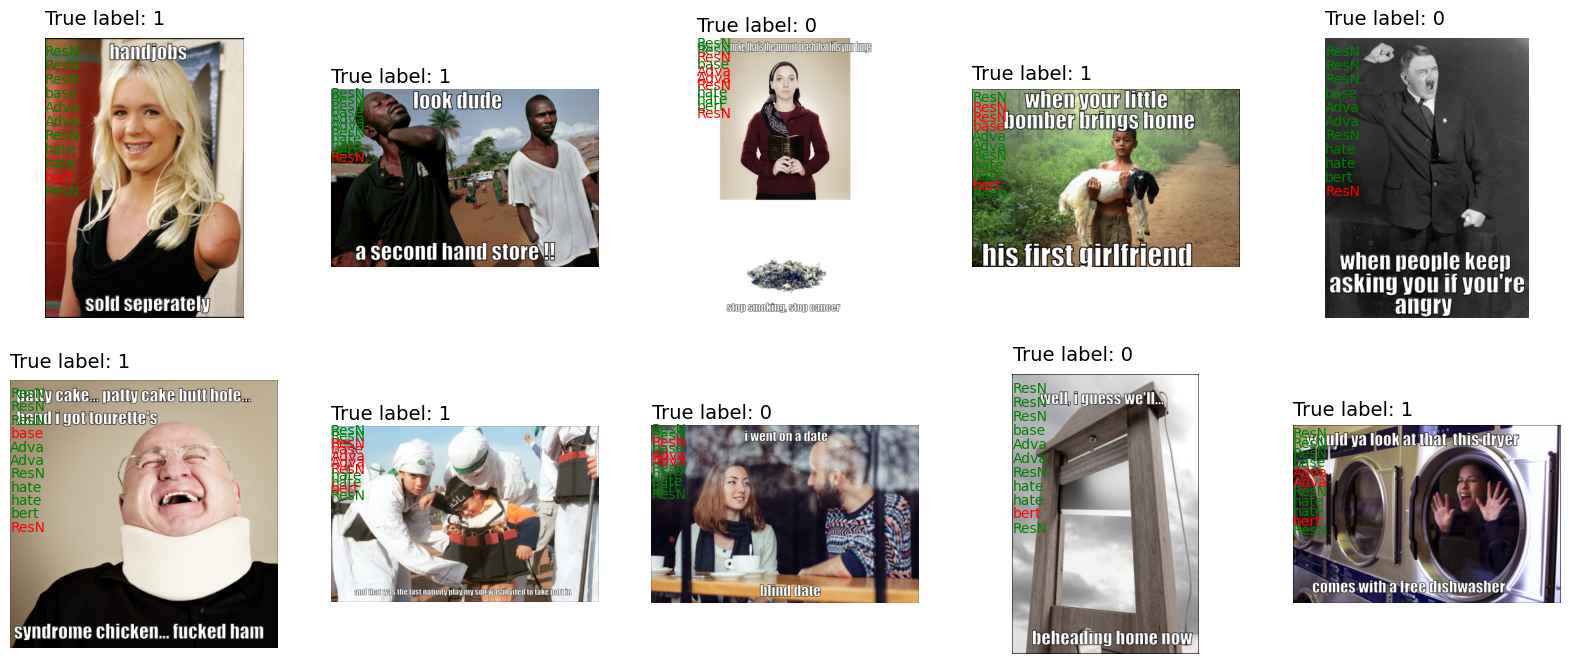

In [8]:
plot_disagreements(df_test, models, datafolder)

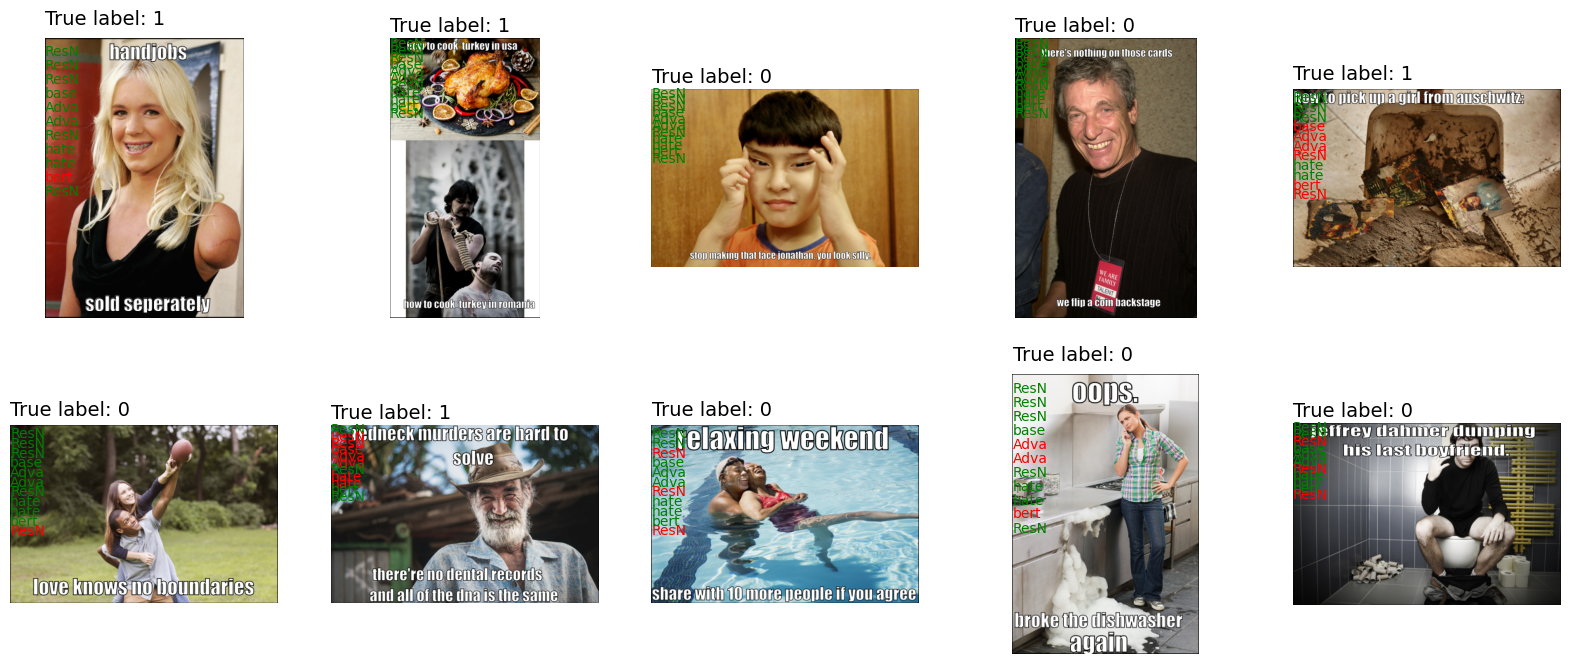

In [9]:
plot_most_significant_disagreements(df_test, models, datafolder)

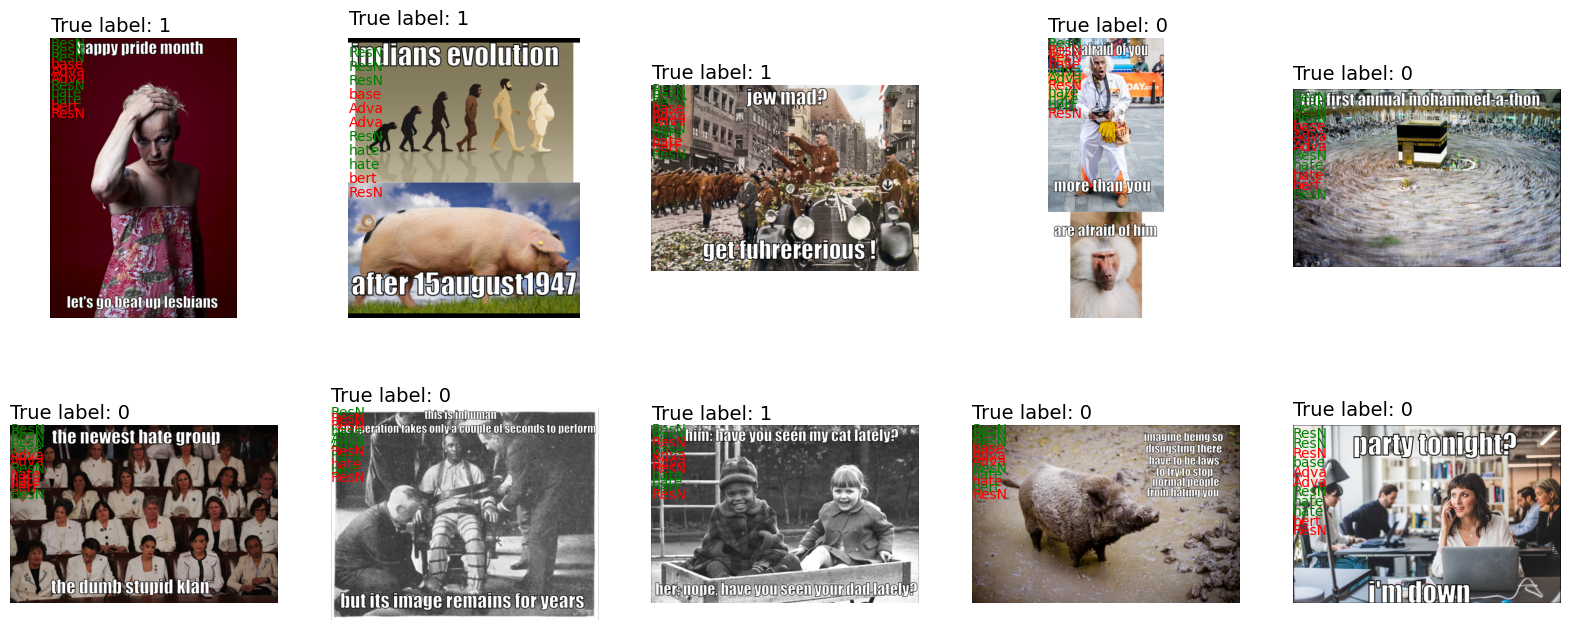

In [12]:
plot_disagreements_by_true(df_test, models, datafolder, 5)

In [11]:
best_combo, best_performance = stacked_ensemble(df_dev, df_test, image_models+text_models, RandomForestClassifier)

In [12]:
best_combo

('ResNet_svm_linear_kernelC10',
 'svm_BoW_baseline_linear_C10',
 'hatebert_vectors',
 'bert_base_cased_finetuned',
 'baseline_svm_char_kernelC10')

In [13]:
best_performance

{'F1-score': 0.5841452525669439,
 'Precision': 0.609447189609055,
 'Recall': 0.5954581832733093,
 'Accuracy': 0.599}

In [14]:
best_combogr, best_performancegr = stacked_ensemble(df_dev, df_test, image_models+text_models, GradientBoostingClassifier)

In [15]:
best_combogr

('ResNet_svm_rbf_kernel',
 'hatebert_direct',
 'hatebert_vectors',
 'bert_base_cased_finetuned',
 'baseline_svm_char_kernelC10')

In [16]:
best_performancegr

{'F1-score': 0.58751149811699,
 'Precision': 0.6083799483648882,
 'Recall': 0.5967587034813926,
 'Accuracy': 0.6}

In [17]:
best_combolr, best_performancelr = stacked_ensemble(df_dev, df_test, image_models+text_models, LogisticRegression)

In [18]:
best_combolr

('ResNet_svm_rbf_kernelC10',
 'ResNet_svm_linear_kernel',
 'ResNet_nn',
 'svm_BoW_baseline_linear_C10',
 'hatebert_direct',
 'hatebert_vectors',
 'bert_base_cased_finetuned')

In [19]:
best_performancelr

{'F1-score': 0.5886652599018556,
 'Precision': 0.6073277084515032,
 'Recall': 0.5969187675070028,
 'Accuracy': 0.6}

In [22]:
df_test.columns

Index(['id', 'img', 'label', 'text', 'tokens', 'lemmas', 'upos', 'pos_fw_emo',
       'count', 'emotion_associations', 'sentiment_score', 'intent',
       'ResNet_svm_rbf_kernel', 'ResNet_svm_rbf_kernelC10',
       'ResNet_svm_linear_kernel', 'svm_BoW_baseline_linear_C10',
       'Advanced_svm_linear_100K_C10', 'ResNet_svm_linear_kernelC10',
       'hatebert_direct', 'hatebert_vectors', 'bert_base_cased_finetuned',
       'ResNet_nn', 'baseline_svm_char_kernelC10'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

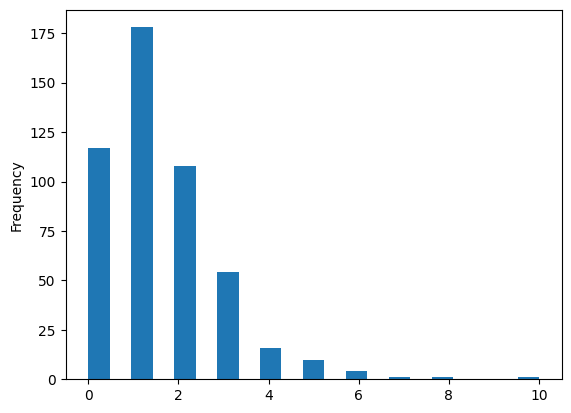

In [48]:
df_test['count'][df_test.label == 1].plot.hist(bins=21)

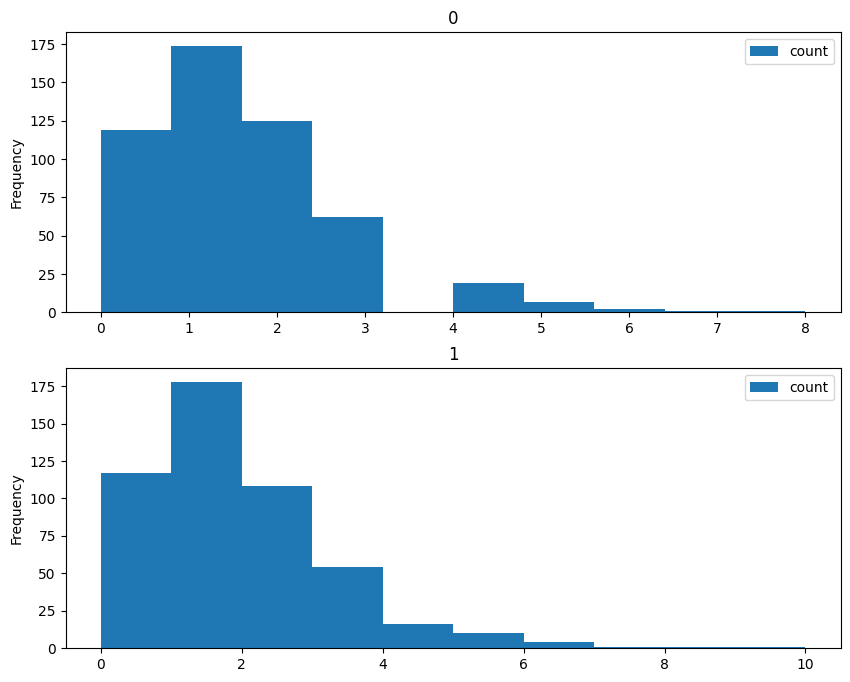

In [57]:
ax = df_test.plot.hist(column=["count"], by="label", figsize=(10, 8))

C:\Users\Hisha\AppData\Local\Temp\ipykernel_24964\3535492848.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_test.plot.hist(column=["sentiment_score"], by="label", ax=ax, yticks=np.arange(0, 300, 25), bins=10)


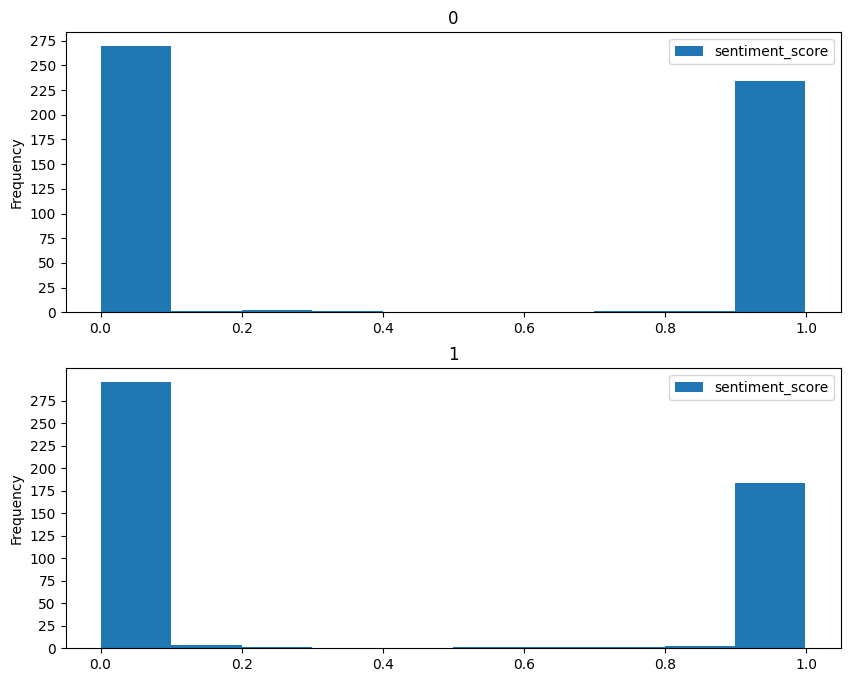

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

df_test.plot.hist(column=["sentiment_score"], by="label", ax=ax, yticks=np.arange(0, 300, 25), bins=10)

# ax2 = ax.twinx()
# ax2.set_ylim(ax.get_ylim())

plt.show()

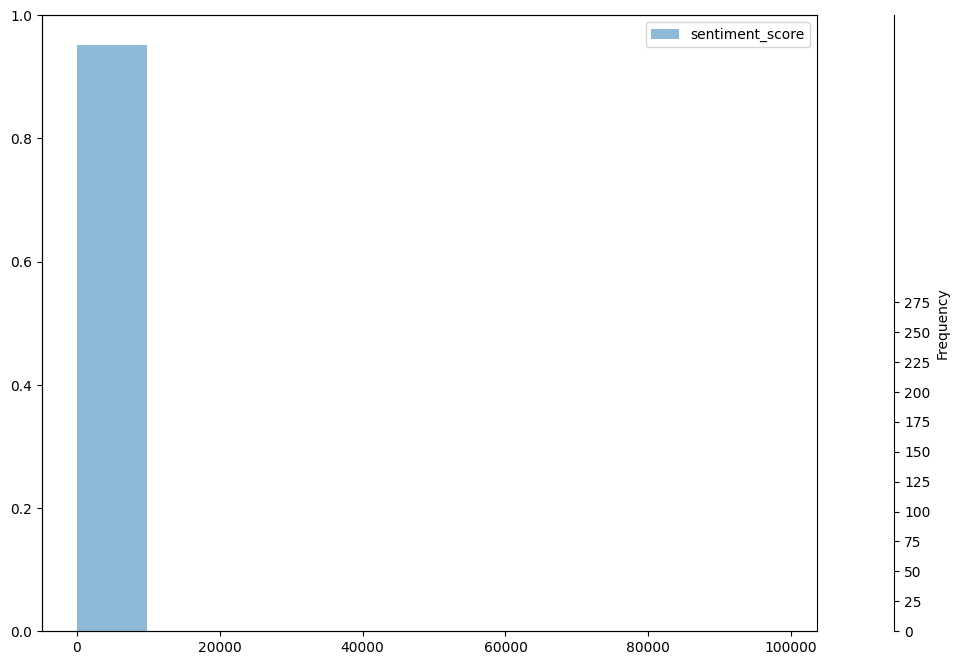

In [75]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

# plot histograms by label and create twin axes for each plot
# for i, label in enumerate([0, 1]):
ax1 = ax.twinx()
df_test[df_test["label"]==label].plot.hist(column=["sentiment_score"], ax=ax1, yticks=np.arange(0, 300, 25), bins=10, alpha=0.5)
ax1.spines["right"].set_position(("axes", 1 + 0.1*i))

# adjust positions of twin axes
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.spines["left"].set_position(("axes", -0.05))
# ax.yaxis.tick_left()
# ax.yaxis.set_label_position("left")
# ax.tick_params(axis="y", direction="out")

# add legends and labels
# plt.legend([0, 1])
# plt.xlabel("Sentiment Score")
# plt.ylabel("Frequency")
# plt.show()